## Homework 6

## <em> MLE, MCMC, Interpolation, Expectation Maximization (EM), and Resampling Methods</em>
<br>
This notebook is arranged in cells. Texts are usually written in the markdown cells, and here you can use html tags (make it bold, italic, colored, etc). You can double click on this cell to see the formatting.<br>
<br>
The ellipsis (...) are provided where you are expected to write your solution but feel free to change the template (not over much) in case this style is not to your taste. <br>
<br>
<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em><br>

***
### Link Okpy

In [ ]:
from client.api.notebook import Notebook
ok = Notebook('hw6_G.ok')
_ = ok.auth(inline = True)

### Imports

In [2]:
import numpy as np
from scipy.integrate import quad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

***

#### Back to Supernova

In this homework, we use a compilation of supernovae data to show that the expansion of the universe is accelerating, and hence it contains dark energy. This is the Nobel prize winning research in 2011 (https://www.nobelprize.org/nobel_prizes/physics/laureates/2011/), and Saul Perlmutter, a professor of physics at Berkeley, shared a prize in 2011 for this discovery.
<br><br>
"The expansion history of the universe can be determined quite easily, using as a “standard candle” any distinguishable class of astronomical objects of known intrinsic brightness that can be identified over a wide distance range. As the light from such beacons travels to Earth through an expanding universe, the cosmic expansion stretches not only the distances between galaxy clusters, but also the very wavelengths of the photons en route. By the time the light reaches us, the spectral wavelength $\lambda$ has thus been redshifted by precisely the same incremental factor $z = \Delta \lambda/\lambda$ by which the cosmos has been stretched in the time interval since the light left its source. The recorded redshift and brightness of each such object thus provide a measurement of the total integrated expansion of the universe since the time the light was emitted. A collection of such measurements, over a sufficient range of distances, would yield an entire historical record of the universe’s expansion." (Saul Perlmutter, http://supernova.lbl.gov/PhysicsTodayArticle.pdf).
<br><br>
Supernovae emerge as extremely promising candidates for measuring the cosmic expansion. Type I Supernovae arises from the collapse of white dwarf stars when the Chandrasekhar limit is reached. Such nuclear chain reaction occurs in the same way and at the same mass, the brightness of these supernovae are always the same. The relationship between the apparent brightness and distance of supernovae depend on the contents and curvature of the universe.
<br><br>
We can infer the "luminosity distance" $D_L$ from measuring the inferred brightness of a supernova of luminosity $L$. Assuming a naive Euclidean approach, if the supernova is observed to have flux $F$, then the area over which the flux is distributed is a sphere radius $D_L$, and hence <br><br>
$$F = \frac{L}{4\pi D_L^2}.$$
<br>
In Big Bang cosmology, $D_L$ is given by:
<br><br>
$$ D_L = \frac{\chi(a)}{a} $$
<br>
where $a$ is the scale factor ($\frac{\lambda_0}{\lambda} = 1 + z = \frac{a_0}{a}$, and the quantity with the subscript 0 means the value at present. Note that $a_0 = 1, z_0 = 0$.), and $\chi$ is the comoving distance, the distance between two objects as would be measured instantaneously today. For a photon, $cdt = a(t)d\chi$, so $\chi(t) = c\int_t^{t_0} \frac{dt'}{a(t')}$. We can write this in terms of a Hubble factor ($H(t) = \frac{1}{a}\frac{da}{dt}$), which tells you the expansion rate: $\chi(a) = c\int_a^1 \frac{da'}{a'^2H(a')} = c\int_0^z \frac{dz'}{H(z')}$. (change of variable using $a = \frac{1}{1+z}$.)
<br><br>
Using the Friedmann equation (which basically solves Einstein's equations for a homogenous and isotropic universe), we can write $H^2$ in terms of the mass density $\rho$ of the components in the universe: $H^2(z) = H_0^2[\Omega_m(1+z)^3 + (1-\Omega_m)(1+z)^2].$ <br><br>
$\Omega$ is the density parameter; it is the ratio of the observed density of matter and energy in the universe ($\rho$) to the critical density $\rho_c$ at which the universe would halt is expansion. So $\Omega_0$ (again, the subscript 0 means the value at the present) is the total mass and energy density of the universe today, and consequently $\Omega_0 = \Omega_{m}$ (matter density parameter today; remember we obtained the best-fit value of this parameter in Project 1?) = $\Omega_{\mathrm{baryonoic\ matter}}$ + $\Omega_{\mathrm{dark\ matter}}$. If $\Omega_0 < 1$, the universe will continue to expand forever. If $\Omega_0 > 1$, the expansion will stop eventually and the universe will start to recollapse. If $\Omega_0 = 1$, then the universe is flat and contains enough matter to halt the expansion but not enough to recollapse it. So it will continue expanding, but gradually slowing down all the time, finally running out of steam only in the infinite future. Even including dark matter in this calculation, cosmologists found that all the matters in the universe only amounts to about a quarter of the required critical mass, suggesting a continuously expanding universe with deceleration. Then, using all this, we can write the luminosity distance in terms of the density parameters: <br><br>
$$ D_L = \frac{\chi(a)}{a} = c(1+z)\int_0^z \frac{dz'}{H(z')} = c(1+z)\int_0^z \frac{dz'}{H_0[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^2]^{1/2}}  $$ <br>
$$ = \frac{2997.92458}{h} (1+z)\int_0^z \frac{dz'}{[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^2]^{1/2}}\ [unit\ of\ Mpc] $$
<br>
where $H_0 = 100\cdot h\ [km\cdot s^{-1} Mpc^{-1}]$.
<br><br>
Fluxes can be expressed in magnitudes $m$, where $m = -2.5\cdot\mathrm{log}_{10}F$ + const. The distance modulus is $\mu = m - M$ ($M$ is the absolute magnitude, the value of $m$ if the supernova is at a distance 10pc. Then, we have:
<br><br>
$$ \mu = 25 + 5\cdot \mathrm{log}_{10}\Big(D_L\ [in\ the\ unit\ of \ Mpc]\Big)$$
<br><br>
In this assignment, we use the SCP Union2.1 Supernova (SN) Ia compilation. (http://supernova.lbl.gov/union/)
<br><br>
First, load the measured data: $z$ (redshift), $\mu$ (distance modulus), $\sigma(\mu)$ (error on distance modulus)


In [ ]:
data = np.loadtxt("sn_z_mu_dmu_plow_union2.1.txt", usecols=range(1,5))
# z
z_data = data[:,0]
# mu
mu_data = data[:,1]
# error on mu (sigma(mu))
mu_err_data = data[:,2]

***

In Project1-part3, with measurements of the distance modulus $\mu$, we used Bayesian analysis to estimate the cosmological parameters $w$ and $\Omega_m$.
<br><br>
Let us assume that the universe is flat (which is a fair assumption since the CMB measurements indicate that the universe has no large-scale curvature). $\Omega_0 = \Omega_m + \Omega_{DE} = 1$. Then, we do not need to worry about the curvature term:<br><br>
$$ D_L = \frac{\chi(a)}{a} = c(1+z)\int_0^z \frac{dz'}{H(z')} = c(1+z)\int_0^z \frac{dz'}{H_0[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^{3(1+w)}]^{1/2}}  $$ <br>
$$ = \frac{2997.92458}{h} (1+z)\int_0^z \frac{dz'}{[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^{3(1+w)}]^{1/2}}\ [unit\ of\ Mpc] $$<br>
where $H_0 = 100\cdot h\ [km\cdot s^{-1} Mpc^{-1}]$.<br><br>
Assuming that errors are Gaussian (can be justified by averaging over large numbers of SN; central limit theorem), we calculate the likelihood $L$ as: <br><br>
$$ L \propto \mathrm{exp}\Big( -\frac{1}{2} \sum_{i = 1}^{N_{\mathrm{SN}}} \frac{[\mu_{i,\ data}(z_i) - \mu_{i,\ model}(z_i, \Omega_m, w)]^2}{\sigma(\mu_i)^2} \Big) $$
<br>
where $z_i, \mu_i, \sigma(\mu_i)$ are from the measurements, and we compute $\mu_{model}$ as a function of $z, \Omega_m, w$.

<br><br>
First, try the <b>maximum likelihood estimation (MLE)</b>. 
<br><br>

<span style="color:blue"> <i> 1. Assuming that $h$ = 0.7, find the maximum likelihood estimation of $\Omega_m$ and $w$ (i.e. find $\Omega_m$ and $w$ which maximizes the likelihood. 
</i></span><br><br>
(Hint: This is very similar to HW5 problem. Take the log of the likelihood and maximize it using scipy.optimize.fmin (https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.optimize.fmin.html). Note that you need to make initial guesses on the parameters in order to use fmin. You can set them to be 0. Caveat: "fmin" minimizes a given function, so you should multiply the log-likelihood by $-1$ in order to maximize it using fmin.)
<br>


In [ ]:
...

In [ ]:
from scipy import optimize

...

***

Next, write an MCMC code using the <b>Metropolis algorithm</b>. In this problem, assume that the universe is flat, and $w = -1$ (dark energy is $\Lambda$.) We call this flat $\Lambda$CDM cosmology. By fixing $h$ and $w$, $D_L = D_L(z, \Omega_m)$.
<br><br>
First, I precalculated $D_L$ for $h = 0.7$ from 2 one-dimensional vectors giving the tabulated values of the parameters $z$ and $\Omega_m$ in the range $0.01 < z < 1.5$ and $0.01 < \Omega_m < 1$. We call the tabulated values of $z$ and $\Omega_m$ as "z_fit" (length 200) and "Om0_fit" (length 100). Then, "DL_fit" is a 2-dimensional grid of tabulated values of $D_L$ (its dimension 200 $\times$ 100. i.e. $D_L$[i,j] is $D_L$$\big($$z$ = z_fit[i], $\Omega_m$ = Om0_fit[j]$\big)$
<br><br>
Now using a 2-D spline interpolation, estimate $D_L(z, \Omega_m)$ for any $z$ and $\Omega_m$.
<br><br>
<span style="color:blue"> <i> 2. Using scipy.interpolate.RectBivariateSpline, estimate $D_L(z, \Omega_m)$ for any $z$ and $\Omega_m$. Plot $\mu = 25 + 5\cdot \mathrm{log}_{10}(D_L(z, \Omega_m = 0.3))$ as a function of $z$ on top of the measured data. How does it fit to the data? </i></span>
<br><br>
(Hint: Let z_spline = RectBivariateSpline(x_fit,y_fit,z_fit). Then, z_spline.ev(x,y) will evaulate the spline at given positions x and y.)

In [ ]:
DL_fit = np.loadtxt("DL_fit.txt").T
Om0_fit = np.loadtxt("Om0_fit.txt")
z_fit = np.loadtxt("z_fit.txt")

In [ ]:
from scipy.interpolate import RectBivariateSpline

...

<br><br>
Now, run the MCMC code to estimate $\Omega_m$. (See Project 1 - Part3 for hints. Solution will be posted on Saturday.)

In Part 4, you calculated $\mu$ from the $\Lambda$CDM model given $z$ and $\Omega_m$, using $D_L$ from the 2D spline interpolation. Using this result, define a function $\mu_{model}$ which outputs $\mu$ from the $\Lambda$CDM theory model given $z$ and $\Omega_m$. Then, Dmu[j] = mu_data[j]-mu_model(z_data[j],Omegam), and the log-likelihood is 
<br><br>
$$ \mathrm{ln}(L) \approx -\frac{1}{2} \sum_{i = 1}^{N_{\mathrm{SN}}} \frac{[\mu_{i,\ data}(z_i) - \mu_{i,\ model}(z_i, \Omega_m)]^2}{\sigma(\mu_i)^2} = -\frac{1}{2} \sum_{i = 1}^{N_{\mathrm{SN}}} \frac{Dmu_i^2}{\sigma(\mu_i)^2} $$

<span style="color:blue"> <i> 3. Define a function for mu_model (mu predicted from theory) and lnL (log-likelihood). Then, you can run the MCMC code and plot the posterior (the routine already given).</i></span>
<br>

In [ ]:
...

<br><br>
Now, include the distance modulus of 12 additional supernovae, which are not-so-good standard candles. They are 3$\sigma$ away from the best-fit mode. 

In [ ]:
data = np.loadtxt("sn_z_mu_dmu_plow_union2.1_outlier.txt", usecols=range(1,5))
# z
z_data = data[:,0]
# mu
mu_data = data[:,1]
# error on mu (sigma(mu))
mu_err_data = data[:,2]

So we have a total of 592 supernovae, and we can see that the last 12 supernovae seem to be outliers. (i.e. mu_data[580:] contains the distance modulus measurements of these 12 supernovae.)
<br><br>
<span style="color:blue"> <i> 4. First run the MCMC code in Part 6 with the new data (total of 592 supernovae). Then, using the estimates of $\Omega_m$ and $w$ from the MCMC chain, calculate the distance modulus from theory and plot the curve on top of the measured data. Plot the measurements of the last 12 supernovae with different color. </i></span><br>

In [ ]:
...

<br><br>
Remember that in HW5, we used the Gaussian mixture to better model the measurements with outliers. Let us apply the same technique in this case.
<br><br>
$$ L = \prod_{i = 1}^{N_{\mathrm{SN}}} \Big[ \frac{g}{\sqrt{2\pi\sigma(\mu_i)^2}}\mathrm{exp}\Big( -\frac{1}{2} \frac{[\mu_{i,\ data}(z_i) - \mu_{i,\ model}(z_i, \Omega_m, w)]^2}{\sigma(\mu_i)^2} \Big) + \frac{1-g}{\sqrt{2\pi\sigma_B^2}}\mathrm{exp}\Big( -\frac{1}{2} \frac{[\mu_{i,\ data}(z_i) - \mu_{i,\ model}(z_i, \Omega_m, w) + \Delta \mu]^2}{\sigma_B^2} \Big) \Big] $$
<br>
Here, we have 5 free parameters: $\Omega_m, w, g, \sigma_B, \Delta \mu$.
<br><br>
With outliers, we think there is something in the noise we do not really understand, which makes error distribution non-Gaussian. So we hope adding a second Gaussian to the model would better describe the pdf. $g$ determines weights on the two Gaussians. $\sigma_B^2$ is the variance of the second Gaussian, which we assume to be larger than the variance of the first Gaussian. $\Delta \mu$ is the distance modulus offset in the second Gaussian.
<br><br>

<span style="color:blue"> <i> 5. Re-run the MCMC code with this new model. Plot 1-d and 2-d constrains of $\Omega_m$ and $w$ as in Part 6 and 7.</i></span><br>

In [ ]:
# Setup

data = np.loadtxt("sn_z_mu_dmu_plow_union2.1_outlier.txt", usecols=range(1,5))
# z
z_data = data[:,0]
# mu
mu_data = data[:,1]
# error on mu (sigma(mu))
mu_err_data = data[:,2]

# length of MCMC chains
nsamples = 15000
# number of parameters
npars    = 5

# Define (gaussian) width of the proposal distribution, one for each parameter. This determines how far you propose jumps
Sigma = 0.01*np.ones(npars)
Sigma[2] = 0.03*np.ones(1)
Sigma[3] = 0.1*np.ones(1)
Sigma[4] = 0.01*np.ones(1)

# Number of supernova:
nSN = len(z_data)

# Declare an empty array of the parameter values of each point. 
# Theta[:,0] stores a trace of the parameter \Omega_m  
# Theta[:,1] stores a trace of the parameter w 
# Theta[:,2] stores a trace of the parameter g
# Theta[:,3] stores a trace of the parameter sigma_B 
# Theta[:,4] stores a trace of the parameter delta mu
# Theta[:,5] stores log-likelihood values at each point
Theta          = np.empty([nsamples,npars+1])

# Dmu stores mu(data)-mu(theory), temporarily:
Dmu = np.empty(nSN)

# Random starting point in parameter space
# Set initial likelihood to low value so next point is accepted (could compute it instead):
Theta[0,:2] = [np.random.uniform(), -np.random.uniform()]
Theta[0,2] = np.random.normal(0.5, 0.1)
Theta[0,3] = np.random.normal(10, 0.1)
Theta[0,4] = np.random.uniform()
Theta[0,npars] = -1.e100

In [ ]:
...

***

Reference: See pg. 8-16 (https://lear.inrialpes.fr/~jegou/bishopreadinggroup/chap9.pdf)
<br><br>
For this Gaussian mixture model, we wish to maximize the likelihood function with respect to the parameters $g, \sigma_B, \Delta \mu$ for $\Omega_m = 0.3, w = -1$. In order to do this, we will apply the <b>expectation-maximization (EM)</b> algorithm. This is an iterative method to find maximum likelihood in the case where the model depends on the hidden/latent variable. Here, we call binary variable <b>a</b> as our latent variable such that $p(a_k = 1) = \pi_k$
<br><br>
Re-write the likelihood as:
<br>
$$ L = \prod_{i = 1}^{N_{\mathrm{SN}}} \Big[ \frac{\pi_1}{\sqrt{2\pi\sigma(\mu_i)^2}}\mathrm{exp}\Big( -\frac{1}{2} \frac{[\mu_{i,\ data}(z_i) - \mu_{i,\ model}(z_i, \Omega_m = 0.3, w = -1)]^2}{\sigma(\mu_i)^2} \Big) + \frac{\pi_2}{\sqrt{2\pi\sigma_B^2}}\mathrm{exp}\Big( -\frac{1}{2} \frac{[\mu_{i,\ data}(z_i) - \mu_{i,\ model}(z_i, \Omega_m = 0.3, w = -1) - \mu_{\mathrm{offset}}]^2}{\sigma_B^2} \Big) \Big] $$
<br>
$$ = \prod_{i = 1}^{N_{\mathrm{SN}}} \Big[ \pi_1  \cdot \mathrm{Normal}\big(\Delta \mu_i = \mu_{i,\ data}-\mu_{i,\ model}\big|\ \overline{\Delta \mu}_{\mathrm{class\ 1}} = 0, \sigma(\mu_i)^2 \big) + \pi_2 \cdot \mathrm{Normal}\big(\Delta \mu_i = \mu_{i,\ data}-\mu_{i,\ model}\big|\ \overline{\Delta \mu}_{\mathrm{class\ 2}} = \mu_{\mathrm{offset}}, \sigma_B^2 \big) \Big] $$
where $\mu_{i,\ model}$ assumes $\Omega_m = 0.3, w = -1$. Suppose that we measure $\Delta \mu = \mu_{i,\ data}-\mu_{i,\ model}$. For the first Gaussian (expected to describe the distribution of 580 non-outlier, standard-candle supernovae), the mean value of $\Delta \mu$ is $0$, and its variance is the measurement noise $\sigma(\mu)^2$. For the second Gaussian which expects to describe the distribution of 12 outliers, we assume that there will be some offset in $\mu$ ($\mu_{\mathrm{offset}}$), so the mean value of $\Delta \mu$ is $\mu_{\mathrm{offset}}$, and it has some unknown variance $\sigma_B^2$.
<br><br>
Now apply the EM algorithm.
<br><br>
1. First, initialize: choose $\pi_1 = 0.95$ and $\pi_2 = 0.05$. Let $\mu_{\mathrm{offset}} = 0, \sigma_B = 0.5$ initially. 
<br><br>
2. <b>Expectation (E) step</b>: Evaluate the responsibilities using the current parameter values.
<br><br>
$$ \gamma_{1,\ i} = \frac{\pi_1  \cdot \mathrm{Normal}\big(\Delta \mu_i \big|\ \overline{\Delta \mu}_{\mathrm{class\ 1}}, \sigma(\mu_i)^2 \big)}{\pi_1  \cdot \mathrm{Normal}\big(\Delta \mu_i \big|\ \overline{\Delta \mu}_{\mathrm{class\ 1}}, \sigma(\mu_i)^2 \big) + \pi_2 \cdot \mathrm{Normal}\big(\Delta \mu_i \big|\ \overline{\Delta \mu}_{\mathrm{class\ 2}}, \sigma_B^2 \big)} $$
$$ \gamma_{2,\ i} = \frac{\pi_2  \cdot \mathrm{Normal}\big(\Delta \mu_i \big|\ \overline{\Delta \mu}_{\mathrm{class\ 2}}, \sigma_B^2 \big)}{\pi_1  \cdot \mathrm{Normal}\big(\Delta \mu_i \big|\ \overline{\Delta \mu}_{\mathrm{class\ 1}}, \sigma(\mu_i)^2 \big) + \pi_2 \cdot \mathrm{Normal}\big(\Delta \mu_i \big|\ \overline{\Delta \mu}_{\mathrm{class\ 2}}, \sigma_B^2 \big)} $$
<br>
where $i = 1, ..., N_{SN}$ (number of measurements). Note that $\gamma_{1}$ and $\gamma_{2}$ are vectors of length $N_{SN}$. For a supernova $i$, $\gamma_{1,\ i}$ describes its probability of belonging to the first class (described by the first Gaussian). (Note: Therefore, in the end, we expect 12 outliers have much higher values of $\gamma_{2}$ than normal 580 supernovae - i.e. they have much greater probability of belonging to the second class. This is a systematic way to identify an outlier.)
<br><br>
3. <b>Maximization (M) step</b>: Re-estimate the parameters using the current responsibilities
<br><br>
$$ \mathrm{The\ mean\ (\overline{\Delta \mu}_{\mathrm{class\ 1}} = 0)\ and\ variance,\ \sigma(\mu_i)^2,\ of\ the\ first\ Gaussian\ are\ fixed\ at\ initial\ values} $$
$$ N_1 = \sum_{i=1}^{N_{SN}} \gamma_{1,\ i},\ \ N_2 = \sum_{i=1}^{N_{SN}} \gamma_{2,\ i}$$
$$ \overline{\Delta \mu}_{\mathrm{class\ 2}} = \frac{1}{N_2} \sum_{i=1}^{N_{SN}} \gamma_{2,\ i} \cdot \Delta \mu_i  $$
$$ \sigma_B^2 =  \frac{1}{N_2} \sum_{i=1}^{N_{SN}} \gamma_{2,\ i} \cdot (\Delta \mu_i - \overline{\Delta \mu}_{\mathrm{class\ 2}})^2$$
$$ \pi_1 = \frac{N_1}{{N_{SN}}},\ \ \pi_2 = \frac{N_2}{{N_{SN}}} $$
<br><br>
4. Evaluate the log-likelihood and check for convergence of either the parameters or the log likelihood. If the convergence criterion is not satisfied return to step 2.
<br><br>

<span style="color:blue"> <i> 6. Using EM, calculate the converged values of $\pi_1$, $\pi_2$, and $N_2$. $N_2$ is the total number of SN in the second class (can be identified as outliers). Iterate until you reach the convergence (parameters not changing). Then, print out the values of $\gamma_{2}$ and show that 12 outliers have higher values of $\gamma_{2}$ than other supernovae. </i></span><br>

In [ ]:
data = np.loadtxt("sn_z_mu_dmu_plow_union2.1_outlier.txt", usecols=range(1,5))
# z
z_data = data[:,0]
# mu
mu_data = data[:,1]
# error on mu (sigma(mu))
mu_err_data = data[:,2]

...
...

***

Finally, we use a <b>Boostrap</b> resampling method to estimate the posterior of $\Omega_m$ and $w$.
<br><br>
Suppose that we have 10 measurements of $x$: [3.7, 3.2, 3.3, 3.1, 3.2, 3.5, 2.9, 3.4, 3.0, 3.1]. Now, randomly take 5 samples of 10 data measurements "with replacement."

In [3]:
x = np.array([3.7, 3.2, 3.3, 3.1, 3.2, 3.5, 2.9, 3.4, 3.0, 3.1])

num_samples = 5
len_x = len(x)
idx = np.random.randint(0, len_x, (num_samples, len_x))
print("After bootstrap re-sampling")
print(x[idx])

After bootstrap re-sampling
[[ 2.9  3.1  3.   3.   3.2  3.1  3.3  3.5  3.4  2.9]
 [ 3.4  3.3  3.   3.2  3.1  3.1  3.5  3.1  3.1  3.4]
 [ 3.2  3.2  3.2  3.2  3.7  3.1  3.2  3.2  3.3  3. ]
 [ 2.9  2.9  2.9  3.2  3.   3.2  3.5  3.1  3.7  3.5]
 [ 3.2  2.9  3.2  3.2  3.3  3.3  3.2  3.2  3.4  3.7]]


Say you wish to see the probability distribution of $\bar{x}$. Then, take 100 samples using bootstrap and plot the histogram of $\bar{x}$.


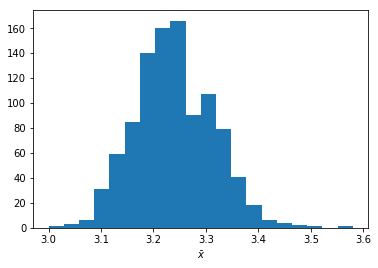

In [4]:
num_samples = 1000
len_x = len(x)
idx = np.random.randint(0, len_x, (num_samples, len_x))
x_bar = np.mean(x[idx], axis = 1)
plt.hist(x_bar,bins=20)
plt.xlabel(r'$\bar{x}$')
plt.show()

Now use bootstrap resampling technique to estimate the posterior of $\Omega_m$ and $w$.
<br><br>
<span style="color:blue"> <i> 7. Take 200 (or more) samples of 580 supernova distance modulus measurements and estimate $\Omega_m$ and $w$ using maximum likelihood estimation, as in Part 3. Plot the 1-d posteriors (histogram).</i></span><br>

In [ ]:
data = np.loadtxt("sn_z_mu_dmu_plow_union2.1.txt", usecols=range(1,5))
# z
z_data = data[:,0]
# mu
mu_data = data[:,1]
# error on mu (sigma(mu))
mu_err_data = data[:,2]

In [ ]:
...

***

## To Submit
Execute the following cell to submit.
If you make changes, execute the cell again to resubmit the final copy of the notebook, they do not get updated automatically.<br>
__We recommend that all the above cells should be executed (their output visible) in the notebook at the time of submission.__ <br>
Only the final submission before the deadline will be graded. 


In [ ]:
_ = ok.submit()